___
# PROJETO 1

## <font color='green'>Bruno Dratcu</font>
___

## <font color='green'>Os aposentados estão melhores que o restante de população?</font>

## Introdução

Quais as diferenças entre os aposentados de hoje em dia e os que ainda irão se aposentar?

lista para compreender:
 - aposentados de hoje em dia são aqueles com mais de 65 anos;
 - ver o curso mais elevado desses aposentados comparando quando eles começaram a trabalhar, a partir dai vamos ver suas rendas
 
 - após analisa-los, veremos os cursos mais elevados dos que irão se aposentar ainda;
 - comparar curso mais elevado deles, vemos as difernças dos aposentados, e ver quando eles começaram a trabalhar
 - pegarems suas rendas e comparar com os aposentados 
 
 - pegar a região na qual tem maior população de aposentados, e ver seus cursos mais elevados em que frequentaram


___
## Análise e Resultados

##NOTAS:

UF ; Unidade de Federação
V8005;3 ;Idade do morador 
V0302;2 ;Sexo
V6002;1 ;Rede de ensino 
V6007;2 ;Curso mais elevado que frequentou anteriormente 
V9891;1 ;Faixa de idade em que começou a trabalhar 
V4706;2 ;Posição na ocupação no trabalho principal 
V4707;1 ;Horas habitualmente trabalhadas por semana em todos os trabalhos 
V4719;12; Rendimento mensal de todos os trabalhos para pessoas de 10 anos ou mais de idade 

In [87]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
import os


In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Bruno Dratcu\Desktop\2o Semestre\Ciencia dos Dados\CD\Projeto1


In [3]:
"""Vamos ler a estrutura da PNAD como um dataframe.
    São muitas colunas e precisamos usar a informação de tamanho para ler a PNAD de fato
    como uma base de tamanho fixo"""
estrutura = pd.read_table("pes_py.txt", sep=";")

In [4]:
estrutura.head()

,Coluna,Tamanho,Título
0,V0101,4,Ano de referência
1,UF,2,Unidade da Federação
2,V0102,6,Número de controle
3,V0103,3,Número de série
4,V0301,2,Número de ordem


In [5]:
# Se quiser uma leitura mais rápida, use o arquivo descompactado. Não esqueça de adicionar ao seu .gitignore
pnad2014 = pd.read_fwf("PES2014.txt", widths=estrutura.Tamanho, header=None)

# Se quiser economizar espaço, use o arquivo Zip
#pnad2014 = pd.read_fwf("PES2014.zip", widths=estrutura.Tamanho, header=None, compression="zip")

In [6]:
pnad2014.head()

,0,1,2,3,4,5,6,7,8,9,...,331,332,333,334,335,336,337,338,339,340
0,2014,11,15,1,1,2,19,8,1987,27,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [7]:
estrutura.columns

Index(['Coluna', 'Tamanho', 'Título'], dtype='object')

In [8]:
pnad2014.columns = estrutura.Coluna

In [9]:
pnad2014.head()

Coluna,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2014,11,15,1,1,2,19,8,1987,27,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [10]:
tabela = pnad2014.loc[:, ["UF", "V8005", "V0302", "V6002", "V6007", "V9891", "V4706", "V4707", "V4719"]]

tabela

Coluna,UF,V8005,V0302,V6002,V6007,V9891,V4706,V4707,V4719
0,11,27,2,NaN,4.0,2.0,1.0,3.0,1500.0
1,11,28,4,NaN,5.0,2.0,NaN,NaN,NaN
2,11,1,2,NaN,NaN,NaN,NaN,NaN,NaN
3,11,51,2,NaN,2.0,2.0,1.0,4.0,1200.0
4,11,43,4,NaN,4.0,1.0,1.0,4.0,1100.0
5,11,77,4,NaN,1.0,NaN,NaN,NaN,NaN
6,11,39,4,NaN,5.0,2.0,NaN,NaN,NaN
7,11,60,2,NaN,1.0,2.0,10.0,3.0,7000.0
8,11,16,4,2.0,NaN,3.0,4.0,2.0,1500.0
9,11,15,2,4.0,NaN,NaN,NaN,NaN,NaN


In [51]:
escolhas = pd.DataFrame()

escolhas["Idade"] = tabela.V8005
escolhas["Sexo"] = tabela.V0302
escolhas["Rede de ensino"] = tabela.V6002
escolhas["Curso mais elevado que frequentou"] = tabela.V6007
escolhas["Faixa de idade em que começou a trabalhar"] = tabela.V9891
escolhas["Posição no trabalho"] = tabela.V4706
escolhas["Horas habitualmente trabalhadas por semana"] = tabela.V4707
escolhas["Rendimento"] = tabela.V4719

escolhas

,Idade,Sexo,Rede de ensino,Curso mais elevado que frequentou,Faixa de idade em que começou a trabalhar,Posição no trabalho,Horas habitualmente trabalhadas por semana,Rendimento
0,27,2,NaN,4.0,2.0,1.0,3.0,1500.0
1,28,4,NaN,5.0,2.0,NaN,NaN,NaN
2,1,2,NaN,NaN,NaN,NaN,NaN,NaN
3,51,2,NaN,2.0,2.0,1.0,4.0,1200.0
4,43,4,NaN,4.0,1.0,1.0,4.0,1100.0
5,77,4,NaN,1.0,NaN,NaN,NaN,NaN
6,39,4,NaN,5.0,2.0,NaN,NaN,NaN
7,60,2,NaN,1.0,2.0,10.0,3.0,7000.0
8,16,4,2.0,NaN,3.0,4.0,2.0,1500.0
9,15,2,4.0,NaN,NaN,NaN,NaN,NaN


In [80]:
n = len(tabela)
tabela.X = pd.Series([""]*n)

escolhas["Regiões"] = tabela.UF
norte = escolhas.Regiões[(tabela.UF>=11) & (tabela.UF<=17)] = "Norte"
nordeste = escolhas.Regiões[(tabela.UF>=21) & (tabela.UF<=29)] = "Nordeste"
sudeste = escolhas.Regiões[(tabela.UF>=31) & (tabela.UF<=35)] = "Sudeste"
sul = escolhas.Regiões[(tabela.UF>=41) & (tabela.UF<=43)] = "Sul"
centro_oeste = escolhas.Regiões[(tabela.UF>=50) & (tabela.UF<=53)] = "Centro-Oeste"


escolhas["Maturidade"] = tabela.V9891
maturo = escolhas.Maturidade[(tabela.V9891>=20) & (tabela.V9891<=100)] = "Maturo para trabalhar"
imaturo = escolhas.Maturidade[(tabela.V9891>=10) & (tabela.V9891<=19)] = "Imaturo para trabalhar"


escolhas["Intelectualidade"] = tabela.V6007
intelectual = escolhas.Intelectualidade[(tabela.V6007>=7) & (tabela.V6007<=9)] = "Tiveram o E.M. completo"  #(estrutura.curso_mais_elevado=5) & (estrutura.curso_mais_elevado>=7) & (estrutura.curso_mais_elevado<=9)] = "Aptos para trabalhar"
nao_intelectual = escolhas.Intelectualidade[(tabela.V6007<=6) & (tabela.V6007>=10)] = "Abaixo do E.M."       #(estrutura.curso_mais_elevado<=4) & (estrutura.curso_mais_elevado=6) & (estrutura.curso_mais_elevado>=10)] = "Abaixo do E.M."

escolhas["Geracao"] = tabela.V8005
nova_geracao = escolhas.Geracao[(tabela.V8005>=10) & (tabela.V8005<=50)] = "Jovens que irão se aposentar"
velha_geracao = escolhas.Geracao[(tabela.V8005>50) & (tabela.V8005<=100)] = "Já aposentados ou já completaram os estudos"

#escolhas["Trabalho"] = tabela.V4706
#bom_trab = escolhas.Trabalho[(tabela.V4706>=20)] = "Considerado um trabalho com maiores lucros"
#ruim_trab = escolhas.Trabalho[(tabela.V4706<=19)] = "Considerando um trabalho com menores lucros"



C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a 

In [81]:
escolhas.UF = tabela.UF.astype('category')
escolhas.UF.cat.categories = ('Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará',
                              'Amapá', 'Tocantins', 'Maranhão','Piauí', 'Ceará',
                              'Rio Grande do Norte','Paraíba', 'Pernambuco', 'Alagoas', 
                              'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 
                              'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 
                              'Rio Grande do Sul','Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 
                              'Distrito Federal')

escolhas.idade = tabela.V8005.astype('category')
#tabela.idade.cat.categories = ()

escolhas.sexo = tabela.V6002.astype('category')
escolhas.sexo.cat.categories = ("Homem", "Mulher")

escolhas.rede_de_ensino = tabela.V6002.astype('category')
escolhas.rede_de_ensino.cat.categories = ("Pública", "Privada")

escolhas.curso_mais_elevado = tabela.V6007.astype('category')
escolhas.curso_mais_elevado.cat.categories = ('Elementar', 'Médio 1o ciclo', 'Médio 2o ciclo', 'Regular do E.F.',
                                            'Regular do E.M.', 'Supletivo do E.F.', 'Supletivo do E.M.', 'ensino superior',
                                            'Mestrado/doutorado', 'Alfabetização (jovens/adultos)', 'Creches', 
                                            'Classe de alfabetização', 'Maternal/jardim') 

escolhas.comecou_trabalho = tabela.V9891.astype('category')
escolhas.comecou_trabalho.cat.categories = ("Até 9 anos", "10 a 14 anos", "15 a 17 anos",
                                          "18 a 19 anos", "20 a 24 anos", "25 a 29 anos",
                                          "30 anos ou mais") 

escolhas.posicao_trabalho = tabela.V4706.astype('category')
escolhas.posicao_trabalho.cat.categories = ('Empregado com carteira de trabalho', 'Militar', 'Funcionário público',
                                          'Empregado sem carteira', 'Trabalhador doméstico com carteira', 'Trabalhador doméstico sem carteira', 
                                          'Conta própria', 'Empregador', 'Trabalhador na produção para o próprio consumo', 'Trabalhador na construção para o próprio uso',
                                          'Não remunerado')

escolhas.horas_trabalhadas = tabela.V4707.astype('category')
escolhas.horas_trabalhadas.cat.categories = ('Até 14 horas', '15 - 39 horas', 
                                           '40 - 44 horas', '45 - 48 horas', 
                                           '49 horas ou mais')

escolhas.rendimento_mensal = tabela.V4719.astype('category')
#tabela.rendimento_mensal.cat.categories = ()

escolhas

,Idade,Sexo,Rede de ensino,Curso mais elevado que frequentou,Faixa de idade em que começou a trabalhar,Posição no trabalho,Horas habitualmente trabalhadas por semana,Rendimento,Regiões,Maturidade,Intelectualidade,Geracao
0,27,2,NaN,4.0,2.0,1.0,3.0,1500.0,Norte,2.0,4,Jovens que irão se aposentar
1,28,4,NaN,5.0,2.0,NaN,NaN,NaN,Norte,2.0,5,Jovens que irão se aposentar
2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,Norte,NaN,NaN,1
3,51,2,NaN,2.0,2.0,1.0,4.0,1200.0,Norte,2.0,2,Já aposentados ou já completaram os estudos
4,43,4,NaN,4.0,1.0,1.0,4.0,1100.0,Norte,1.0,4,Jovens que irão se aposentar
5,77,4,NaN,1.0,NaN,NaN,NaN,NaN,Norte,NaN,1,Já aposentados ou já completaram os estudos
6,39,4,NaN,5.0,2.0,NaN,NaN,NaN,Norte,2.0,5,Jovens que irão se aposentar
7,60,2,NaN,1.0,2.0,10.0,3.0,7000.0,Norte,2.0,1,Já aposentados ou já completaram os estudos
8,16,4,2.0,NaN,3.0,4.0,2.0,1500.0,Norte,3.0,NaN,Jovens que irão se aposentar
9,15,2,4.0,NaN,NaN,NaN,NaN,NaN,Norte,NaN,NaN,Jovens que irão se aposentar


In [19]:
reg = escolhas.Regiões.value_counts(True)*100
reg

Sudeste         29.378673
Nordeste        28.889189
Norte           15.958271
Sul             15.334214
Centro-Oeste    10.439653
Name: Regiões, dtype: float64

In [20]:
idade = escolhas.idade #.value_counts(True)#*1000
idade

0         27
1         28
2          1
3         51
4         43
5         77
6         39
7         60
8         16
9         15
10        12
11        68
12        35
13        18
14        14
15        60
16        58
17        55
18        60
19        33
20        33
21        29
22        39
23        42
24         5
25        65
26        62
27        48
28        48
29        20
          ..
362597    19
362598    14
362599    46
362600    49
362601    23
362602    19
362603    13
362604    51
362605    39
362606    22
362607    24
362608    19
362609    60
362610    53
362611    27
362612    25
362613    19
362614    17
362615    13
362616    55
362617    49
362618     7
362619    23
362620    24
362621    27
362622    31
362623    46
362624    36
362625    18
362626    17
Name: V8005, dtype: category
Categories (112, int64): [0, 1, 2, 3, ..., 108, 112, 118, 120]

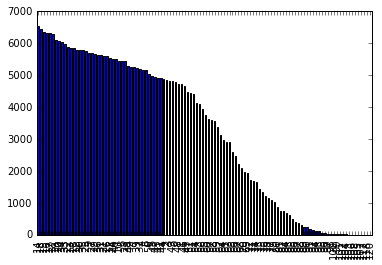

In [21]:
idade.value_counts().plot.bar()

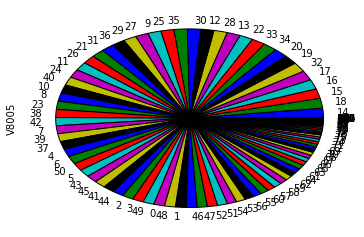

In [23]:
idade.value_counts().plot.pie()

In [24]:
sexo = escolhas.sexo.value_counts(True)*100
sexo

Homem     74.540534
Mulher    25.459466
Name: V6002, dtype: float64

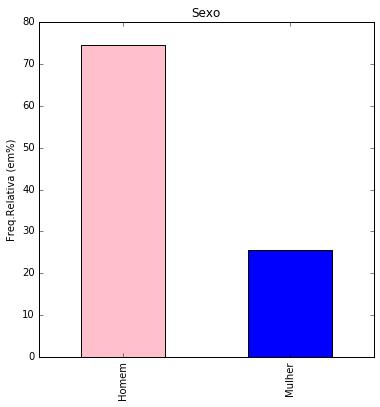

In [25]:
plot = sexo.plot(kind='bar',title='Sexo',figsize=(6, 6), color=('pink','b'))
plt.ylabel('Freq.Relativa (em%)')

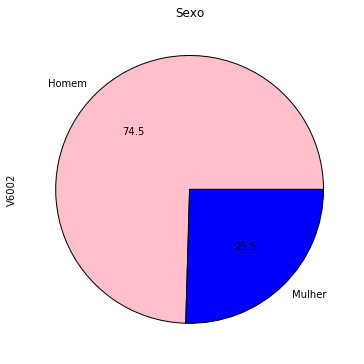

In [26]:
plot = sexo.plot(kind='pie',colors=('pink','b'),title='Sexo',autopct='%.1f',figsize=(6, 6))

In [27]:
ensi = escolhas.rede_de_ensino.value_counts(True)*100
ensi

Pública    74.540534
Privada    25.459466
Name: V6002, dtype: float64

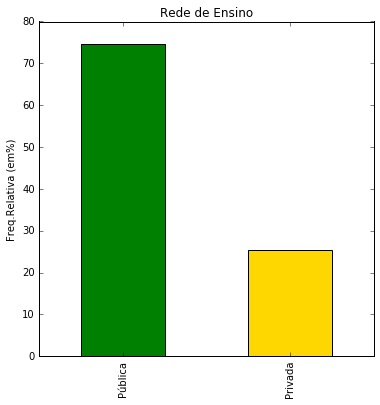

In [28]:
plot = ensi.plot(kind='bar',title='Rede de Ensino',figsize=(6, 6), color=("g", "gold"))
plt.ylabel('Freq.Relativa (em%)')

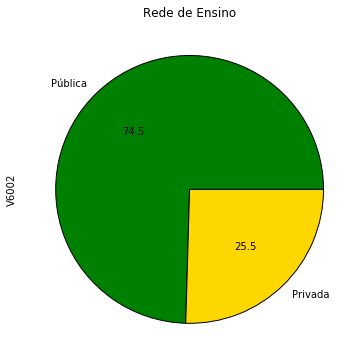

In [29]:
plot = ensi.plot(kind='pie',colors=("g", "gold"), title='Rede de Ensino',autopct='%.1f',figsize=(6, 6))

In [30]:
curso = escolhas.curso_mais_elevado.value_counts(True)*100
curso

Regular do E.M.                   33.420174
Regular do E.F.                   28.910858
ensino superior                   14.783146
Elementar                         13.470103
Médio 1o ciclo                     2.659140
Supletivo do E.M.                  1.955864
Médio 2o ciclo                     1.651415
Supletivo do E.F.                  1.256937
Mestrado/doutorado                 0.724587
Classe de alfabetização            0.520607
Alfabetização (jovens/adultos)     0.350551
Creches                            0.200936
Maternal/jardim                    0.095684
Name: V6007, dtype: float64

In [ ]:
plot = curso.plot(kind='bar',title='Curso mais elevado',figsize=(6, 6)) #, color=("g", "gold"))
plt.ylabel('Freq.Relativa (em%)')

In [ ]:
plot = curso.plot(kind='pie', title='Curso mais elevado',autopct='%.1f',figsize=(6, 6))

In [31]:
idade_trab = escolhas.comecou_trabalho.value_counts(True)*100
idade_trab

10 a 14 anos       34.210775
15 a 17 anos       28.387687
18 a 19 anos       16.814076
Até 9 anos          9.852556
20 a 24 anos        8.318698
25 a 29 anos        1.616940
30 anos ou mais     0.799268
Name: V9891, dtype: float64

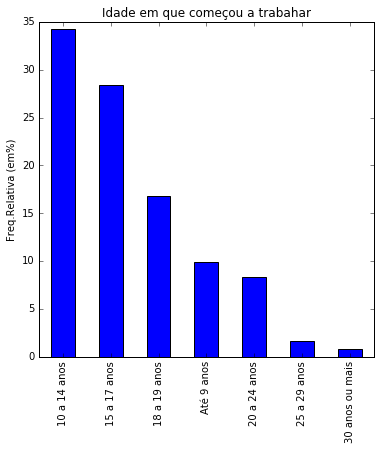

In [32]:
plot = idade_trab.plot(kind='bar',title='Idade em que começou a trabahar',figsize=(6, 6)) #, color=("g", "gold"))
plt.ylabel('Freq.Relativa (em%)')

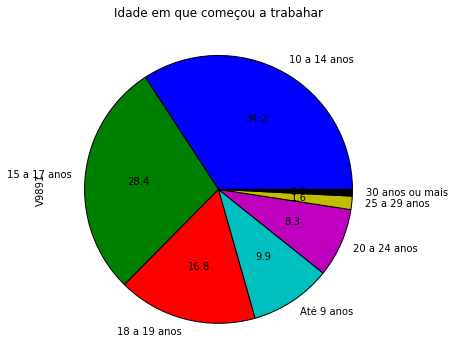

In [33]:
plot = idade_trab.plot(kind='pie', title='Idade em que começou a trabahar',autopct='%.1f',figsize=(6, 6))

In [34]:
posi = escolhas.posicao_trabalho.value_counts(True)*100
posi

Empregado com carteira de trabalho                38.486496
Conta própria                                     21.630146
Empregado sem carteira                            14.887039
Funcionário público                                7.215333
Trabalhador doméstico sem carteira                 4.543910
Trabalhador na produção para o próprio consumo     4.242115
Empregador                                         3.579639
Não remunerado                                     2.876394
Trabalhador doméstico com carteira                 2.030463
Militar                                            0.383897
Trabalhador na construção para o próprio uso       0.124568
Name: V4706, dtype: float64

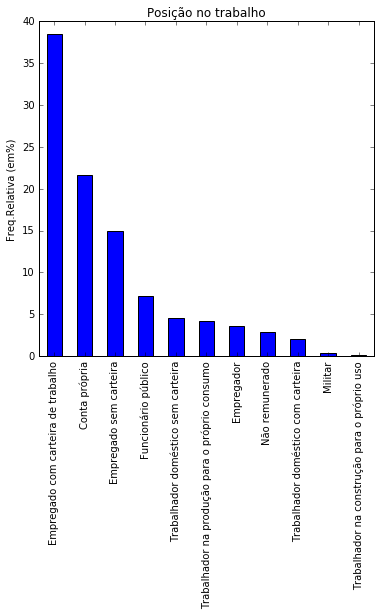

In [35]:
plot = posi.plot(kind='bar',title='Posição no trabalho',figsize=(6, 6)) #, color=("g", "gold"))
plt.ylabel('Freq.Relativa (em%)')

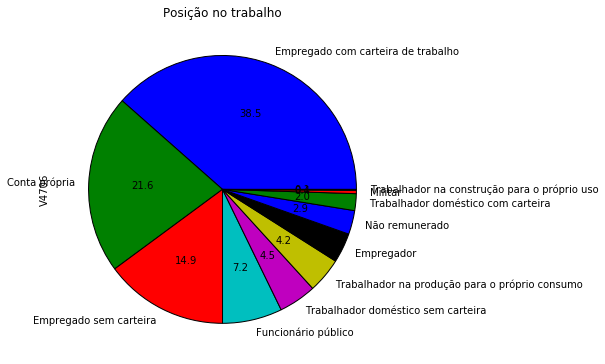

In [36]:
plot = posi.plot(kind='pie', title='Posição no trabalho',autopct='%.1f',figsize=(6, 6))

In [37]:
horas = escolhas.horas_trabalhadas.value_counts(True)*100
horas

40 - 44 horas       46.332597
15 - 39 horas       21.663552
49 horas ou mais    13.267652
45 - 48 horas       12.670857
Até 14 horas         6.065342
Name: V4707, dtype: float64

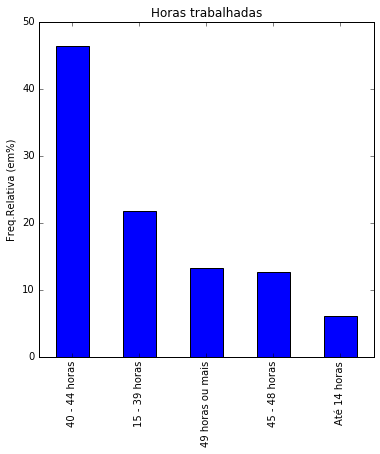

In [38]:
plot = horas.plot(kind='bar',title='Horas trabalhadas',figsize=(6, 6)) #, color=("g", "gold"))
plt.ylabel('Freq.Relativa (em%)')

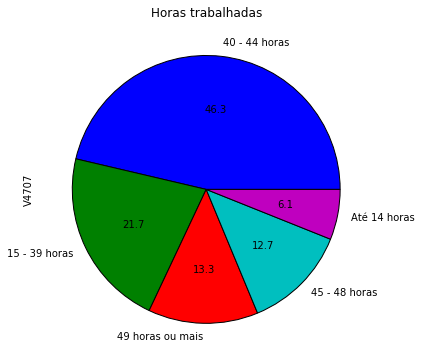

In [39]:
plot = horas.plot(kind='pie', title='Horas trabalhadas',autopct='%.1f',figsize=(6, 6))

In [40]:
rendi = escolhas[(escolhas.rendimento_mensal != 999999999999) & (~escolhas.rendimento_mensal.isnull())]
rendi.describe()

C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,Idade do morador,Sexo,Rede de ensino,Curso mais elevado que frequentou,Faixa de idade em que começou a trabalhar,Posição no trabalho,Horas habitualmente trabalhadas por semana,Rendimento,Gerações
count,172673.000000,172673.000000,17441.000000,149620.000000,172673.000000,172673.000000,172673.000000,172673.000000,172673.000000
mean,38.643343,2.863482,2.886188,4.958528,2.861171,4.797919,3.051907,1619.184487,38.643343
std,13.856014,0.990640,0.993531,1.969707,1.219342,3.821149,1.054631,2721.373333,13.856014
min,10.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,10.000000
25%,28.000000,2.000000,NaN,NaN,2.000000,1.000000,2.000000,724.000000,28.000000
50%,37.000000,2.000000,NaN,NaN,3.000000,4.000000,3.000000,1000.000000,37.000000
75%,49.000000,4.000000,NaN,NaN,4.000000,9.000000,4.000000,1700.000000,49.000000
max,120.000000,4.000000,4.000000,13.000000,7.000000,13.000000,5.000000,330000.000000,120.000000


In [71]:
print('Tabela Cruzada por CURSO MAIS ELEVADO vs POSIÇÃO NO TRABALHO (em %):')
ct=pd.crosstab(escolhas.Intelectualidade, escolhas.posicao_trabalho, margins=True,rownames=['Educação'], colnames=['Posição no trabalho'])

ct1=(ct/len(escolhas)*100).round(decimals=0)
ct1


Tabela Cruzada por CURSO MAIS ELEVADO vs POSIÇÃO NO TRABALHO (em %):


Posição no trabalho,Empregado com carteira de trabalho,Militar,Funcionário público,Empregado sem carteira,Trabalhador doméstico com carteira,Trabalhador doméstico sem carteira,Conta própria,Empregador,Trabalhador na produção para o próprio consumo,Trabalhador na construção para o próprio uso,Não remunerado,All
Educação,,,,,,,,,,,,
1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,4.0,0.0,0.0,2.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,13.0
5.0,8.0,0.0,1.0,2.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,15.0
6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


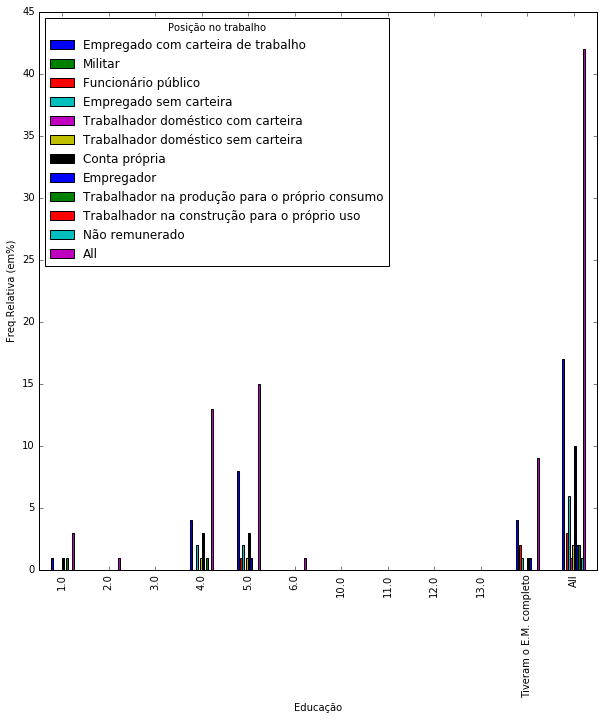

In [72]:
plot = ct1.plot(kind='bar', figsize=(10, 10))
plt.ylabel('Freq.Relativa (em%)')

In [84]:
#Grafico que mostra os aposentados que tiveram uma bom ensino de estudo cruzado com quantos anos começou a trabalhar

print('Tabela Cruzada por CURSO MAIS ELEVADO vs QUANDO COMEÇOU A TRABALHAR? (em %):')
ct2=pd.crosstab(intelectual, escolhas.Maturidade, margins=True,rownames=['Curso'], colnames=['Quando começou a trabalhar?'])

ct3=(ct2/len(escolhas)*100).round(decimals=0)
ct3


Tabela Cruzada por CURSO MAIS ELEVADO vs QUANDO COMEÇOU A TRABALHAR? (em %):


Quando começou a trabalhar?,1.0,2.0,3.0,4.0,5.0,6.0,7.0,All
Curso,,,,,,,,
Tiveram o E.M. completo,5.0,18.0,15.0,9.0,4.0,1.0,0.0,52.0
All,5.0,18.0,15.0,9.0,4.0,1.0,0.0,52.0


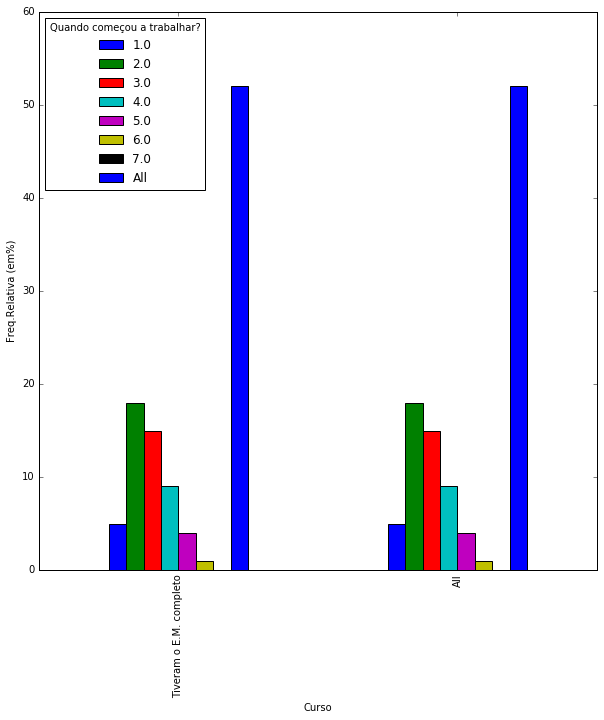

In [85]:
plot = ct3.plot(kind='bar', figsize=(10, 10))
plt.ylabel('Freq.Relativa (em%)')

In [61]:
#Grafico que mostra os aposentados que começaram a trabalhar com uma idade após o E.S. cruzando com a posição do trebalho

print('Tabela Cruzada por COMEÇOU A TRABALHAR (com uma idade matura) vs POSIÇÃO NO TRABALHO (em %):')
ct4=pd.crosstab(maturo, escolhas.posicao_trabalho, margins=True,rownames=['Idade matura que começou a trabalhar'], colnames=['Posição no trabalho'])

ct5=(ct4/len(escolhas)*100).round(decimals=0)
ct5

Tabela Cruzada por COMEÇOU A TRABALHAR (com uma idade matura) vs POSIÇÃO NO TRABALHO (em %):


Posição no trabalho,Empregado com carteira de trabalho,Militar,Funcionário público,Empregado sem carteira,Trabalhador doméstico com carteira,Trabalhador doméstico sem carteira,Conta própria,Empregador,Trabalhador na produção para o próprio consumo,Trabalhador na construção para o próprio uso,Não remunerado,All
Idade matura que começou a trabalhar,,,,,,,,,,,,
Maturo para trabalhar,19.0,0.0,4.0,7.0,1.0,2.0,11.0,2.0,2.0,0.0,1.0,49.0
All,19.0,0.0,4.0,7.0,1.0,2.0,11.0,2.0,2.0,0.0,1.0,49.0


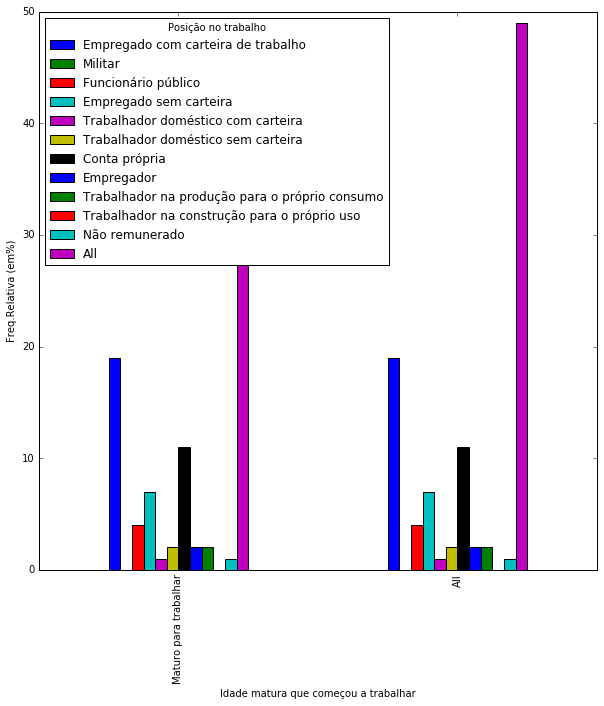

In [62]:
plot = ct5.plot(kind='bar', figsize=(10, 10))
plt.ylabel('Freq.Relativa (em%)')

In [ ]:
#Grafico que mostra posição do trabalho com a renda

In [ ]:
#conclusão: os aposentados que tiveram bom cargo, começaram a trbalhar depois dos estudos (bem-formados), ganharam mais??

In [ ]:
#Grafico que mostra os jovens que irão se aposentar cruzado com maior curso elevado

In [ ]:
#Grafico que mostra os jovens que irão se aposentar, o curso mais elevado cruzado com quando eles começaram a trabalhar

In [ ]:
#Grafico que mostra a renda pela posição do trbalho

#conclusão: vendo os graficos, é possivel ver que os jovens de hoje estudam mais/menos do que os aposentados antigamento, consequentimento tiveram cargos melhores/piores do que os aposentados, tendo entao, uma renda maior/menor

In [88]:
escolhas.idade.describe()

faixa = arange(0,120,10)

plot = escolhas.idade.plot.hist(bins=faixa, normed=1, color="red")
plt.title("Histograma de Idade")
plt.xlabel("Idade (Anos)")
plt.ylabel("Frequência relativa")

TypeError: Empty 'DataFrame': no numeric data to plot

___
## Conclusão 

Descreva aqui suas conclusões!